# Project_11 - Regression (Drilling)

# Machine Learning in Business
**Project description**
<br>You work for the OilyGiant mining company. Your task is to find the best place for a new well.
<br>
<br>Steps to choose the location:
<br>Collect the oil well parameters in the selected region: oil quality and volume of reserves;
<br>Build a model for predicting the volume of reserves in the new wells;
<br>Pick the oil wells with the highest estimated values;
<br>Pick the region with the highest total profit for the selected oil wells.
<br>You have data on oil samples from three regions. Parameters of each oil well in the region are already known.
<br>Build a model that will help to pick the region with the highest profit margin.
<br>Analyze potential profit and risks using the Bootstrapping technique.

**Project instructions**
<br>Download and prepare the data. Explain the procedure.
<br>Train and test the model for each region:
<br>2.1. Split the data into a training set and validation set at a ratio of 75:25.
<br>2.2. Train the model and make predictions for the validation set.
<br>2.3. Save the predictions and correct answers for the validation set.
<br>2.4. Print the average volume of predicted reserves and model RMSE.
<br>2.5. Analyze the results.

**Prepare for profit calculation:**
<br>3.1. Store all key values for calculations in separate variables.
<br>3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
<br>3.3. Provide the findings about the preparation for profit calculation step.

**Write a function to calculate profit from a set of selected oil wells and model predictions:**
<br>4.1. Pick the wells with the highest values of predictions.
<br>4.2. Summarize the target volume of reserves in accordance with these predictions
<br>4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

**Calculate risks and profit for each region:**
<br>5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
<br>5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
<br>5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

**Data description**
<br>Geological exploration data for the three regions are stored in files: (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv)
<br>id — unique oil well identifier
<br>f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
<br>product — volume of reserves in the oil well (thousand barrels).

**Conditions:**
<br>Only linear regression is suitable for model training (the rest are not sufficiently predictable).
<br>When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
<br>The budget for development of 200 oil wells is 100 USD million.
<br>One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
<br>After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
<br>The data is synthetic: contract details and well characteristics are not disclosed.

# 1. Download and prepare the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

In [2]:
df0 = pd.read_csv('datasets/project_04_dataset_1.csv')
df1 = pd.read_csv('datasets/project_04_dataset_2.csv')
df2 = pd.read_csv('datasets/project_04_dataset_3.csv')

In [3]:
# df0.to_csv('~/work/project_datasets/project_04_dataset_1.csv', index=False, header=list(df0.columns))
# df1.to_csv('~/work/project_datasets/project_04_dataset_2.csv', index=False, header=list(df1.columns))
# df2.to_csv('~/work/project_datasets/project_04_dataset_3.csv', index=False, header=list(df2.columns))

In [3]:
display(df0.head())
df0.info()
display(df0.describe())
display(df0.duplicated().sum())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


0

In [5]:
display(df1.head())
df1.info()
display(df1.describe())
display(df1.duplicated().sum())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


0

In [6]:
display(df2.head())
df2.info()
display(df2.describe())
display(df2.duplicated().sum())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


0

There were no missing values or duplicated rows in the datasets.
<br>The data types and data distributions seem normal.

# 2. Train and test the model for each region
<br>Train and test the model for each region:
<br>2.1. Split the data into a training set and validation set at a ratio of 75:25.
<br>2.2. Train the model and make predictions for the validation set.
<br>2.3. Save the predictions and correct answers for the validation set.
<br>2.4. Print the average volume of predicted reserves and model RMSE.
<br>2.5. Analyze the results.

In [6]:
features0 = df0.drop(['id','product'], axis=1)
target0 = df0['product']

features0_train, features0_valid, target0_train, target0_valid = train_test_split(features0, target0, test_size=0.25, random_state=12345)
model = LinearRegression()
scaler = StandardScaler()

scaler.fit_transform(features0_train)
scaler.transform(features0_valid)

model.fit(features0_train, target0_train)
target0_pred = model.predict(features0_valid)

display(f'R0 Model RMSE: {MSE(target0_valid, target0_pred, squared=False):.2f}')
display(f'R0 Predicted Mean Reserve: {target0_pred.mean():.2f}')

'R0 Model RMSE: 37.58'

'R0 Predicted Mean Reserve: 92.59'

In [7]:
features1 = df1.drop(['id','product'], axis=1)
target1 = df1['product']

features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1, target1, test_size=0.25, random_state=12345)
model = LinearRegression()
scaler = StandardScaler()

scaler.fit_transform(features1_train)
scaler.transform(features1_valid)

model.fit(features1_train, target1_train)
target1_pred = model.predict(features1_valid)

display(f'R1 Model RMSE: {MSE(target1_valid, target1_pred, squared=False):.2f}')
display(f'R1 Predicted Mean Reserve: {target1_pred.mean():.2f}')

'R1 Model RMSE: 0.89'

'R1 Predicted Mean Reserve: 68.73'

In [8]:
features2 = df2.drop(['id','product'], axis=1)
target2 = df2['product']

features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2, target2, test_size=0.25, random_state=12345)
model = LinearRegression()
scaler = StandardScaler()

scaler.fit_transform(features2_train)
scaler.transform(features2_valid)

model.fit(features2_train, target2_train)
target2_pred = model.predict(features2_valid)

display(f'R2 Model RMSE: {MSE(target2_valid, target2_pred, squared=False):.2f}')
display(f'R2 Predicted Mean Reserve: {target2_pred.mean():.2f}')

'R2 Model RMSE: 40.03'

'R2 Predicted Mean Reserve: 94.97'

The predicted mean volumes of oil reserves for R0 and R2 are higher than that of R1. However, the RMSE is also significantly higher for both R0 and R2, indicating that these models' predictions have a higher margin of error.
<br>The RMSE for R1 is extremely low, indicating that the model's predictions are very accurate.

# 3. Prepare for profit calculation
<br>3.1. Store all key values for calculations in separate variables.
<br>3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
<br>3.3. Provide the findings about the preparation for profit calculation step.

In [9]:
developing_wells = 200
development_budget = 100000000
revenue_per_1000_barrels = 4500

#calculate the volume of reserves sufficient for developoing a new well without loss
volume = development_budget/ developing_wells / revenue_per_1000_barrels

display(f'Break-even Product Volume: {volume:.2f}')
display(f'R0 Predicted Mean Reserve: {target0_pred.mean()}')
display(f'R1 Predicted Mean Reserve: {target1_pred.mean()}')
display(f'R2 Predicted Mean Reserve: {target2_pred.mean()}')

'Break-even Product Volume: 111.11'

'R0 Predicted Mean Reserve: 92.59256778438035'

'R1 Predicted Mean Reserve: 68.728546895446'

'R2 Predicted Mean Reserve: 94.96504596800489'

The volume of reserves sufficient for developing a new well without loss is 111.11.
<br>This means none of the 3 regions' average oil reserve per well meets the reserve requirement.
<br>Since each region and each location's oil reserve varies greatly, we will find the top 200 wells from each region and compare the potential total profits.

# 4. Calculate profit from a set of selected oil wells and model predictions
<br>4.1. Pick the wells with the highest values of predictions.
<br>4.2. Summarize the target volume of reserves in accordance with these predictions
<br>4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [10]:
def profit(target, predictions, count):
    top_wells = pd.Series(predictions).sort_values(ascending=False).head(count).index
    total_reserves = target.iloc[top_wells].sum()
    revenue = total_reserves * revenue_per_1000_barrels
    profit = revenue - development_budget
    return total_reserves, profit

In [11]:
#Potential profits when selecting the top 200 wells from each region.
R0_total_reserves, R0_potential_profit = profit(target0_valid, target0_pred, developing_wells)
R1_total_reserves, R1_potential_profit = profit(target1_valid, target1_pred, developing_wells)
R2_total_reserves, R2_potential_profit = profit(target2_valid, target2_pred, developing_wells)

display(f'R0 Total Reserves: {R0_total_reserves:.2f}')
display(f'R0 Potential Profit: {R0_potential_profit:.2f}')
display(f'R1 Total Reserves: {R1_total_reserves:.2f}')
display(f'R1 Potential Profit: {R1_potential_profit:.2f}')
display(f'R2 Total Reserves: {R2_total_reserves:.2f}')
display(f'R2 Potential Profit: {R2_potential_profit:.2f}')

'R0 Total Reserves: 29601.84'

'R0 Potential Profit: 33208260.43'

'R1 Total Reserves: 27589.08'

'R1 Potential Profit: 24150866.97'

'R2 Total Reserves: 28245.22'

'R2 Potential Profit: 27103499.64'

When the best 200 wells from each region could be developed, all regions are able to turn a profit after subtracting the development cost.
<br>The size of the total reserves and potential profits are as follows: R0 > R2 > R1.
<br>Given these assessments, it would seem that R0 has the highest profit potential if the top 200 wells could be identified and developed.

# 5. Calculate risks and profit for each region
<br>5.1 Use the bootstrapping technique with 1000 samples to find the distribution of profit.
<br>5.2 Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
<br>5.3 Provide findings: suggest a region for development of oil wells and justify the choice.

In [12]:
n_bootstrap_samples = 1000
bootstrap_profits0 = []
for i in range(n_bootstrap_samples):
    subsample = pd.Series(target0_pred).sample(n=500, replace=True)
    subsample_reserve, subsample_profit = profit(target0_valid, subsample, developing_wells)
    bootstrap_profits0.append(subsample_profit)

bootstrap_profits0 = pd.Series(bootstrap_profits0)    
avg_profit0 = sum(bootstrap_profits0) / len(bootstrap_profits0)
ci0 = [bootstrap_profits0.quantile(0.025), bootstrap_profits0.quantile(0.975)]
risk_of_loss0 = (sum([profit < 0 for profit in bootstrap_profits0]) / len(bootstrap_profits0))  * 100

In [13]:
bootstrap_profits1 = []
for i in range(n_bootstrap_samples):
    subsample = pd.Series(target1_pred).sample(n=500, replace=True)
    subsample_reserve, subsample_profit = profit(target1_valid, subsample, developing_wells)
    bootstrap_profits1.append(subsample_profit)
    
bootstrap_profits1 = pd.Series(bootstrap_profits1)   
avg_profit1 = sum(bootstrap_profits1) / len(bootstrap_profits1)
ci1 = [bootstrap_profits1.quantile(0.025), bootstrap_profits1.quantile(0.975)]
risk_of_loss1 = (sum([profit < 0 for profit in bootstrap_profits1]) / len(bootstrap_profits1))  * 100

In [14]:
bootstrap_profits2 = []
for i in range(n_bootstrap_samples):
    subsample = pd.Series(target2_pred).sample(n=500, replace=True)
    subsample_reserve, subsample_profit = profit(target2_valid, subsample, developing_wells)
    bootstrap_profits2.append(subsample_profit)

bootstrap_profits2 = pd.Series(bootstrap_profits2)   
avg_profit2 = sum(bootstrap_profits2) / len(bootstrap_profits2)
ci2 = [bootstrap_profits2.quantile(0.025), bootstrap_profits2.quantile(0.975)]
risk_of_loss2 = (sum([profit < 0 for profit in bootstrap_profits2]) / len(bootstrap_profits2)) * 100

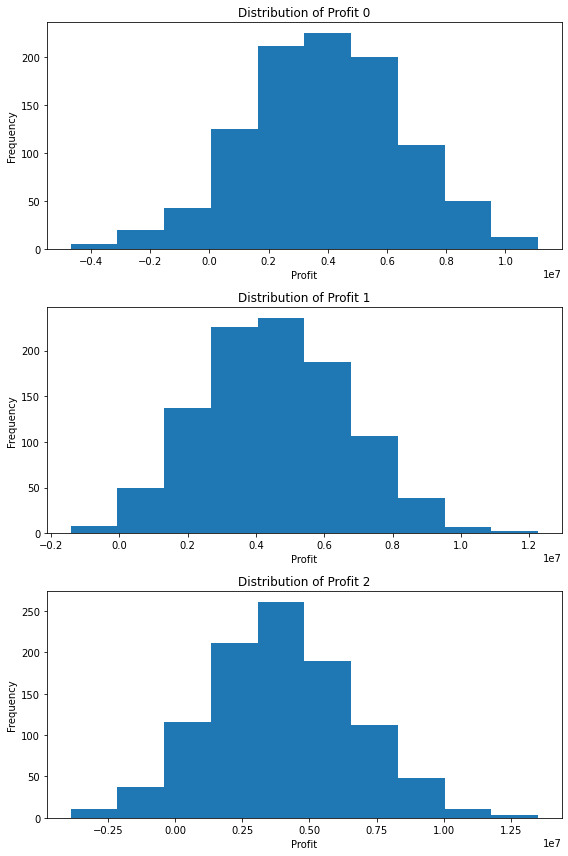

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].hist(bootstrap_profits0)
axs[0].set_xlabel('Profit')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Profit 0')

axs[1].hist(bootstrap_profits1)
axs[1].set_xlabel('Profit')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Profit 1')

axs[2].hist(bootstrap_profits2)
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Profit 2')

fig.tight_layout()
plt.show()

Using the bootstrapping technique with 1000 samples to graph the distribution of profit, R1 seems to have the profit distribution with the smallest standard deviation and the lowest probability of loss.

In [16]:
display(f'Region 0 Avg Profit: {avg_profit0:.2f}')
display(f'Region 0 95% CI: {ci0}')
display(f'Region 0 Risk of Loss: {risk_of_loss0:.2f}%')
display(f'Region 1 Avg Profit: {avg_profit1:.2f}')
display(f'Region 1 95% CI: {ci1}')
display(f'Region 1 Risk of Loss: {risk_of_loss1:.2f}%')
display(f'Region 2 Avg Profit: {avg_profit2:.2f}')
display(f'Region 2 95% CI: {ci2}')
display(f'Region 2 Risk of Loss: {risk_of_loss2:.2f}%')

'Region 0 Avg Profit: 3871949.37'

'Region 0 95% CI: [-1508786.84338468, 8827283.162353132]'

'Region 0 Risk of Loss: 6.60%'

'Region 1 Avg Profit: 4565877.99'

'Region 1 95% CI: [617544.5446651742, 9043693.74162285]'

'Region 1 Risk of Loss: 0.90%'

'Region 2 Avg Profit: 3973603.04'

'Region 2 95% CI: [-1037903.7157682426, 9337521.819051174]'

'Region 2 Risk of Loss: 7.10%'

## Conclusions
I suggest the company select Region 1 for development of oil wells.
<br>Given the risk of loss threshold of 2.5% provided by the firm, only Region 1 meets the risk tolerance requirement.
<br>Also, R1 had the highest profit potential out of the three regions, as indicated by the average profit and the 95% confidence interval.